In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob
import pickle

#from helperfunctions import *

# 1. Camera Calibration

## 1.1. Find Chessboard Corners.

In [2]:
# Prepare object points
nx = 9 # Number of inside corners in any given row
ny = 6 # Number of inside corners in any given column
showimages = True
# Read in and make a list of calibration images

# glob allows us to read in files with consistent file names
# e.g. calibration-1.jpg, calibration-2.jpg...
calibration_images = glob.glob("camera_cal/calibration*.jpg")

# Generate object points
object_point_grid = np.zeros((6*9, 3), np.float32)
object_point_grid[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

def cal_undistort(img, objpoints, imgpoints):
    """Returns undistorted image."""
    # Calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    # Undistort image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

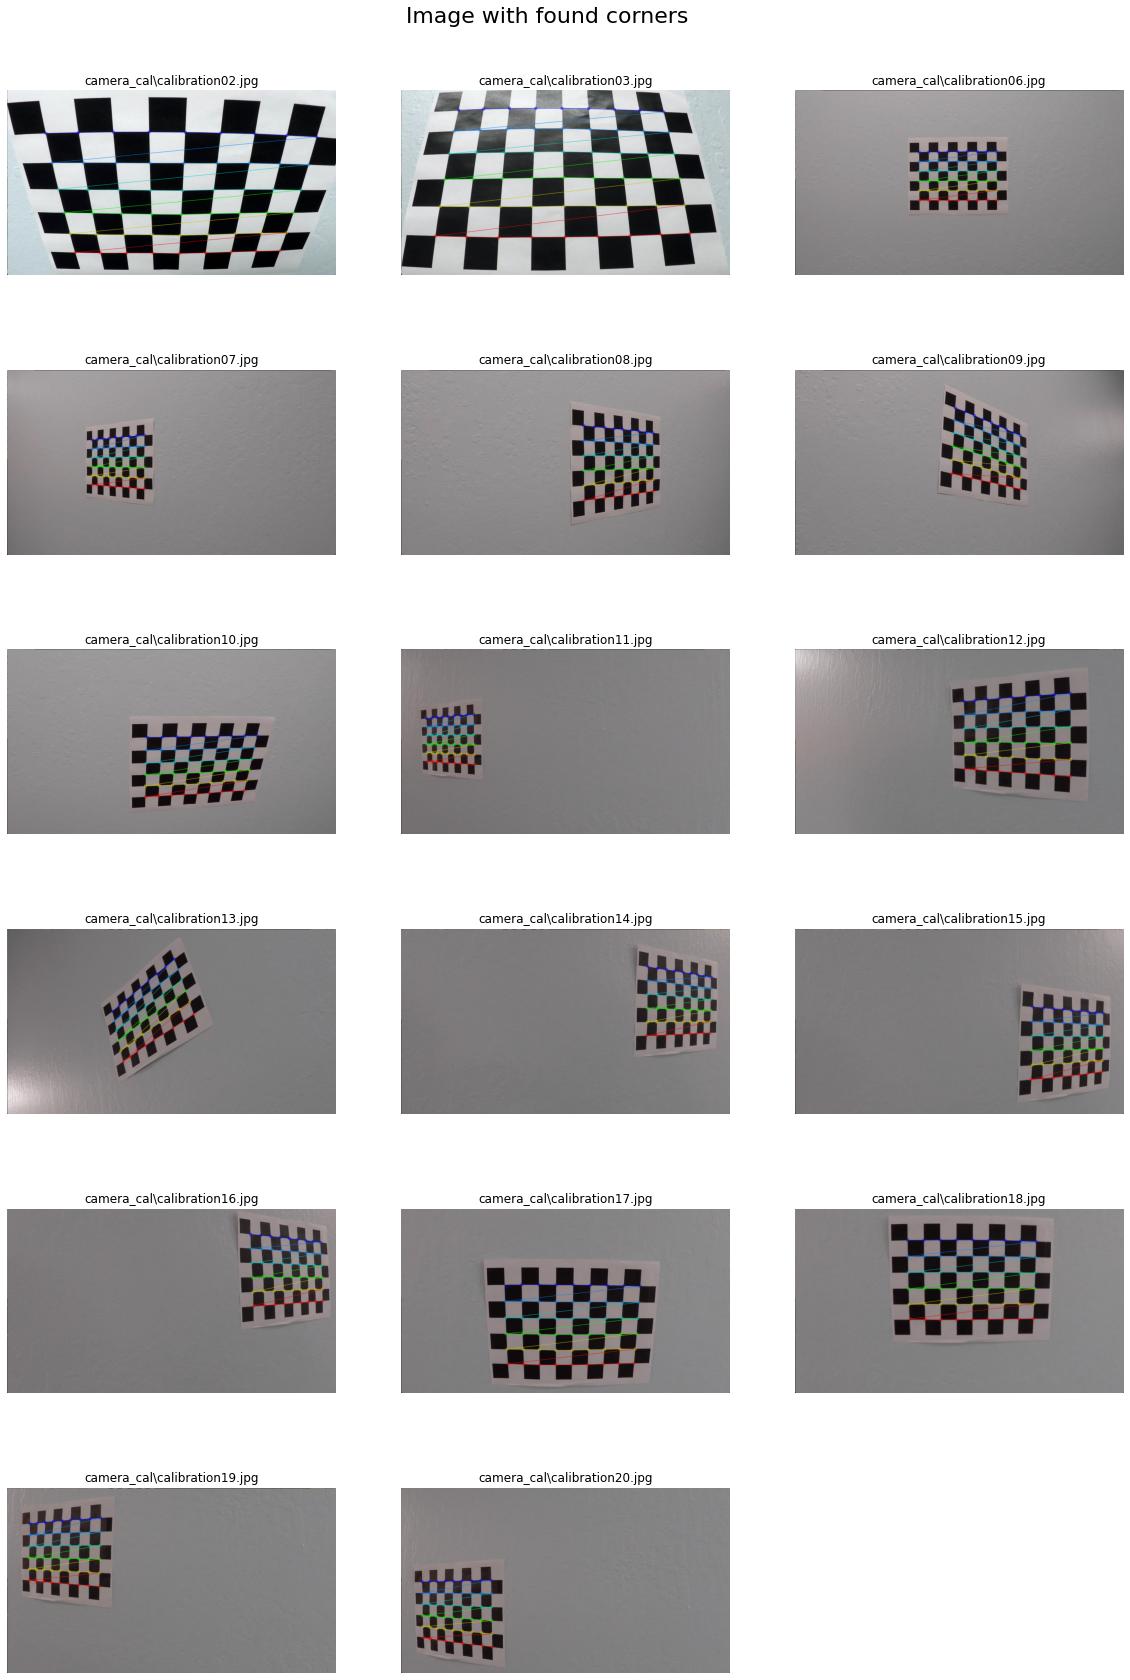

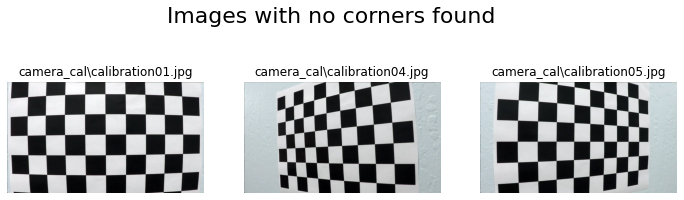

In [3]:
# Initialise image and object point arrays
objpoints = []
imgpoints = []
img_no_corners = [] #Calibration images in which opencv failed to find corners
plt.figure(figsize=(20, 30)) #Figure for calibration images
plt.figtext(0.5,0.9,'Image with found corners', fontsize=22, ha='center')

for idx, fname in enumerate(calibration_images):

    # Read in image
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    # Parameters: (image, chessboard dims, param for any flags)
    # chessboard dims = inside corners, not squares.
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Fill image point and object point arrays
        imgpoints.append(corners)
        objpoints.append(object_point_grid)
        # Draw and display the corners
        if showimages:
            plt.subplot(6, 3, len(imgpoints))
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.imshow(img)
            plt.title(fname)
            plt.axis('off')
    else:
        img_no_corners.append(fname)
plt.show()
#Plot Images with no corners found
plt.figure(figsize=(12, 4))
plt.figtext(0.5,0.9,'Images with no corners found', fontsize=22, ha='center')
for i, p in enumerate(img_no_corners):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.imread(p))
    plt.title(p)
    plt.axis('off')
plt.show()


## 1.2 Compute the Camera Calibration Matrix and Distortion Coefficients

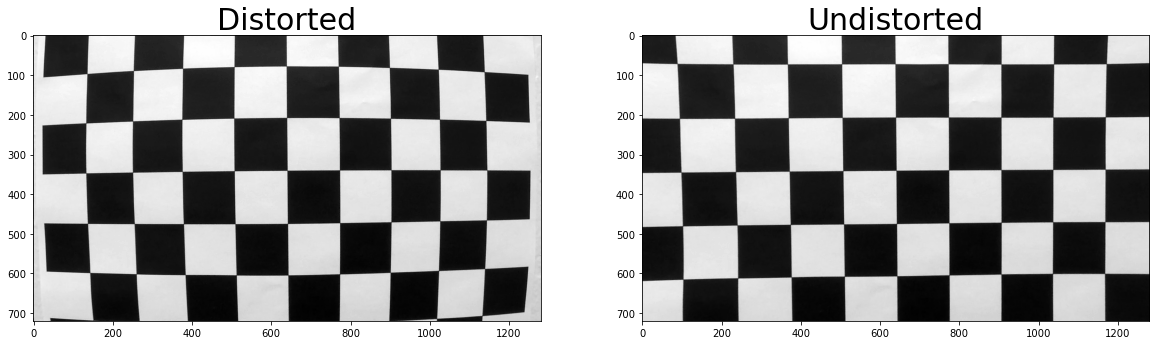

In [4]:
# Find the camera distortion from the image points discovered above
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,(720, 1280),None,None,)

# Create an example image with an undistortion operation applied
example_distorted_image = cv2.imread('camera_cal/calibration01.jpg')
example_distorted_image_grayscaled = cv2.cvtColor(example_distorted_image, cv2.COLOR_BGR2GRAY)
example_undistorted_image = cv2.undistort(example_distorted_image_grayscaled,mtx,dist)

# Display our example images
if showimages:
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(example_distorted_image_grayscaled, cmap='gray')
    plt.title('Distorted', fontsize=30)
    plt.subplot(122),plt.imshow(example_undistorted_image, cmap='gray')
    plt.title('Undistorted', fontsize=30)

## 1.3 Save the camera calibration result for later use


In [5]:
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "Project_Output/cam_calib_res.p", "wb" ) )